## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set(style="whitegrid")
sns.set_context("talk")

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [34]:

df = pd.read_csv("/content/sample_data/titanic.csv")


print(df.describe())


print(df.shape)


print(df.dtypes)
print(df.count())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Na

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [35]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Тут ми бачимо, що пропущені значення є в рядках: Age: 177, Cabin: 687 та Embarked: 2

***Завдання 3:*** Побудувати матрицю кореляції



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



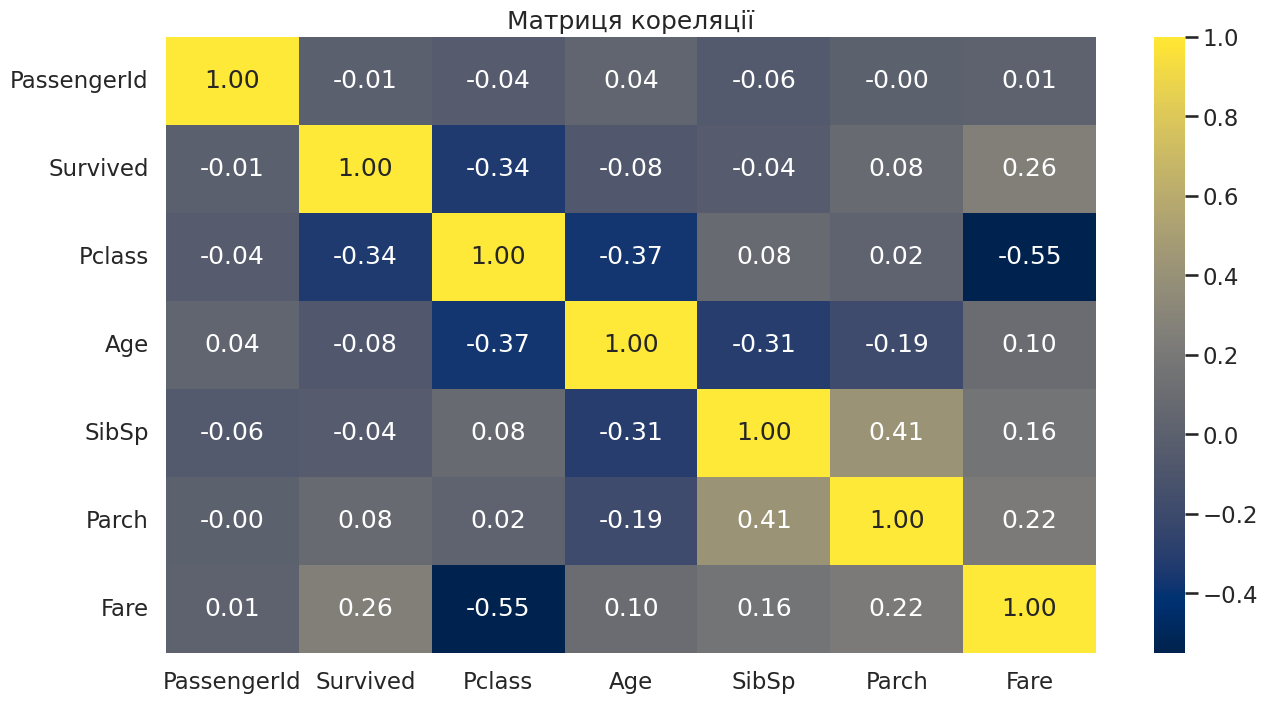

In [36]:
dfNum = df.select_dtypes(include=["number"])
correlation = dfNum.corr(method="pearson")

plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap="cividis", fmt=".2f")
plt.title("Матриця кореляції")
plt.show()

Спираючись на коефіцієнти кореляції, можна зробити висновок, що кореляція позитивна, бо на головній діагоналі число від 0 до +1. Тобто усі числові змінні зростають.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [37]:
def median(df, missValues, columnsList):
    for missValue in missValues:
          df[missValue] = df.groupby(columnsList)[missValue].transform(lambda x: x.fillna(x.median()))
    return df

df = median(df, ["Age"], ["Pclass"])
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Так як медіана працює тільки з числовими значеннями, я зміг заповнити тільки рядок Age. Перевірка показує що стало 0 рядків із значенням NaN у рядку Age



***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні.

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків.


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





<ipython-input-38-fdf81776690b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts = df.groupby("Age_bin")["Survived"].sum()


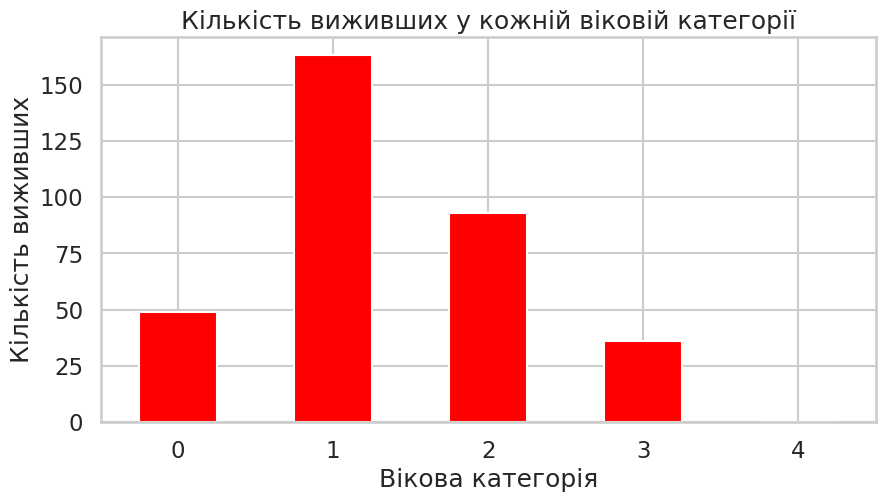

In [38]:
bins = np.arange(0, 81, 16)
labels = [0, 1, 2, 3, 4]
df["Age_bin"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
survival_counts = df.groupby("Age_bin")["Survived"].sum()

plt.figure(figsize=(10, 5))
survival_counts.plot(kind="bar", color="red")
plt.title("Кількість виживших у кожній віковій категорії")
plt.xlabel("Вікова категорія")
plt.ylabel("Кількість виживших")
plt.xticks(ticks=np.arange(len(survival_counts)), labels=[0, 1, 2, 3, 4], rotation=0)
plt.show()

У висновку ми бачимо, що найбільше вижило людей з категорією 1, тобто від 16 до 32 років

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали```
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

<ipython-input-39-0d5e5ca12aae>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts = df.groupby("Fare_bin")["Survived"].sum()
<ipython-input-39-0d5e5ca12aae>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = df.groupby("Fare_bin")["Survived"].count() - survival_counts


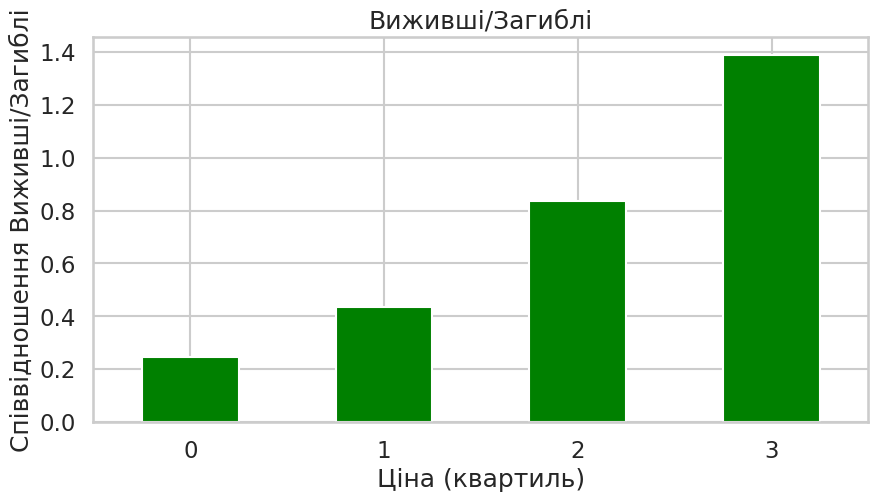

In [39]:
df["Fare_bin"] = pd.qcut(df["Fare"], q=4, labels=[0, 1, 2, 3])
survival_counts = df.groupby("Fare_bin")["Survived"].sum()
death_counts = df.groupby("Fare_bin")["Survived"].count() - survival_counts
survival_to_death_ratio = survival_counts / death_counts

plt.figure(figsize=(10, 5))
survival_to_death_ratio.plot(kind="bar", color="green")
plt.title("Виживші/Загиблі")
plt.xlabel("Ціна (квартиль)")
plt.ylabel("Співвідношення Виживші/Загиблі")
plt.xticks(ticks=np.arange(len(survival_to_death_ratio)), labels=[0, 1, 2, 3], rotation=0)
plt.show()


Гіпотеза є вірною, що кількість виживших пасажирів для квартильних значеннь змінної fare відрізняється

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [40]:
df["Family_size"] = df["Parch"] + df["SibSp"]
df['Alone'] = df['Family_size'].apply(lambda x: 1 if x == 0 else 0)


family = df.groupby("Family_size")["Survived"].mean()
print(family)
alone = df.groupby("Alone")["Survived"].mean()
print(alone)

Family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64
Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


Згідно з статистикою, бачимо, що більші шанси на виживання людей, які без сім'ї

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [41]:
df.drop(columns = ["Cabin"], inplace = True)

Було видалено колонку "Cabin", бо там найбільше пропущених значень


***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [42]:
df['Title'] = df['Name'].str.extract(r' (Mr|Mrs)\.')
df['Title'] = df['Title'].map({'Mr': 1, 'Mrs': 2}).fillna(0).astype(int)

df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])

Тут було додано колонку Title, і перетворено усі змінні в числові


***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



<ipython-input-54-84c482747490>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
<ipython-input-54-84c482747490>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")


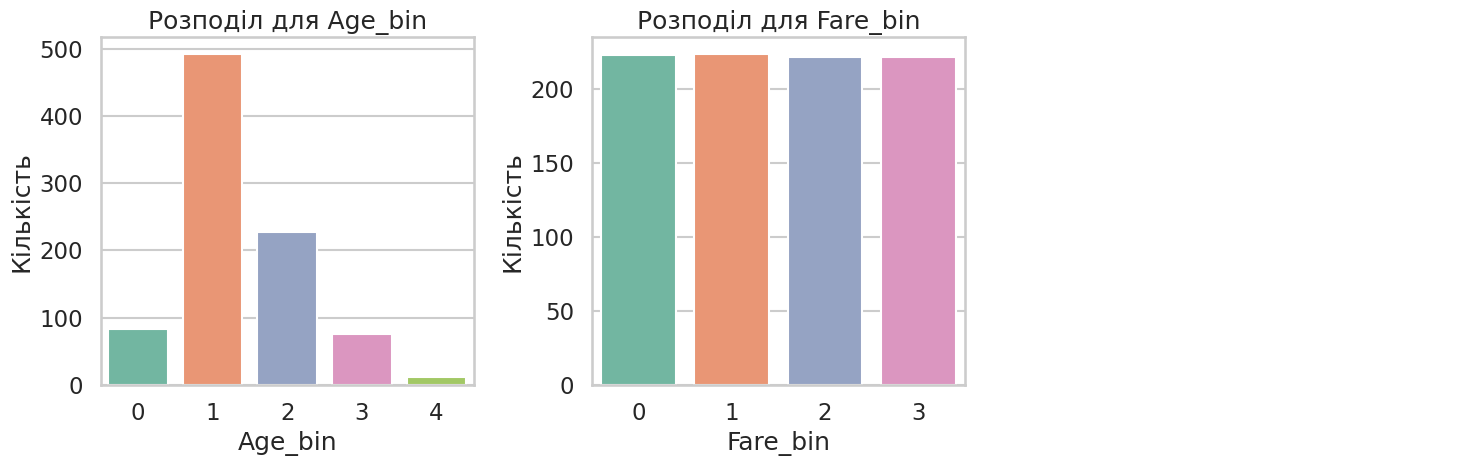

In [54]:
categorical_cols = df.select_dtypes(include=["category"]).columns
num_cols = len(categorical_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Розподіл для {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Кількість")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

Спостереження по кожній категоріальній змінній


***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

<ipython-input-53-5993e441ba78>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
<ipython-input-53-5993e441ba78>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
<ipython-input-53-5993e441ba78>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
<ipython-input-53-5993e441ba78>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

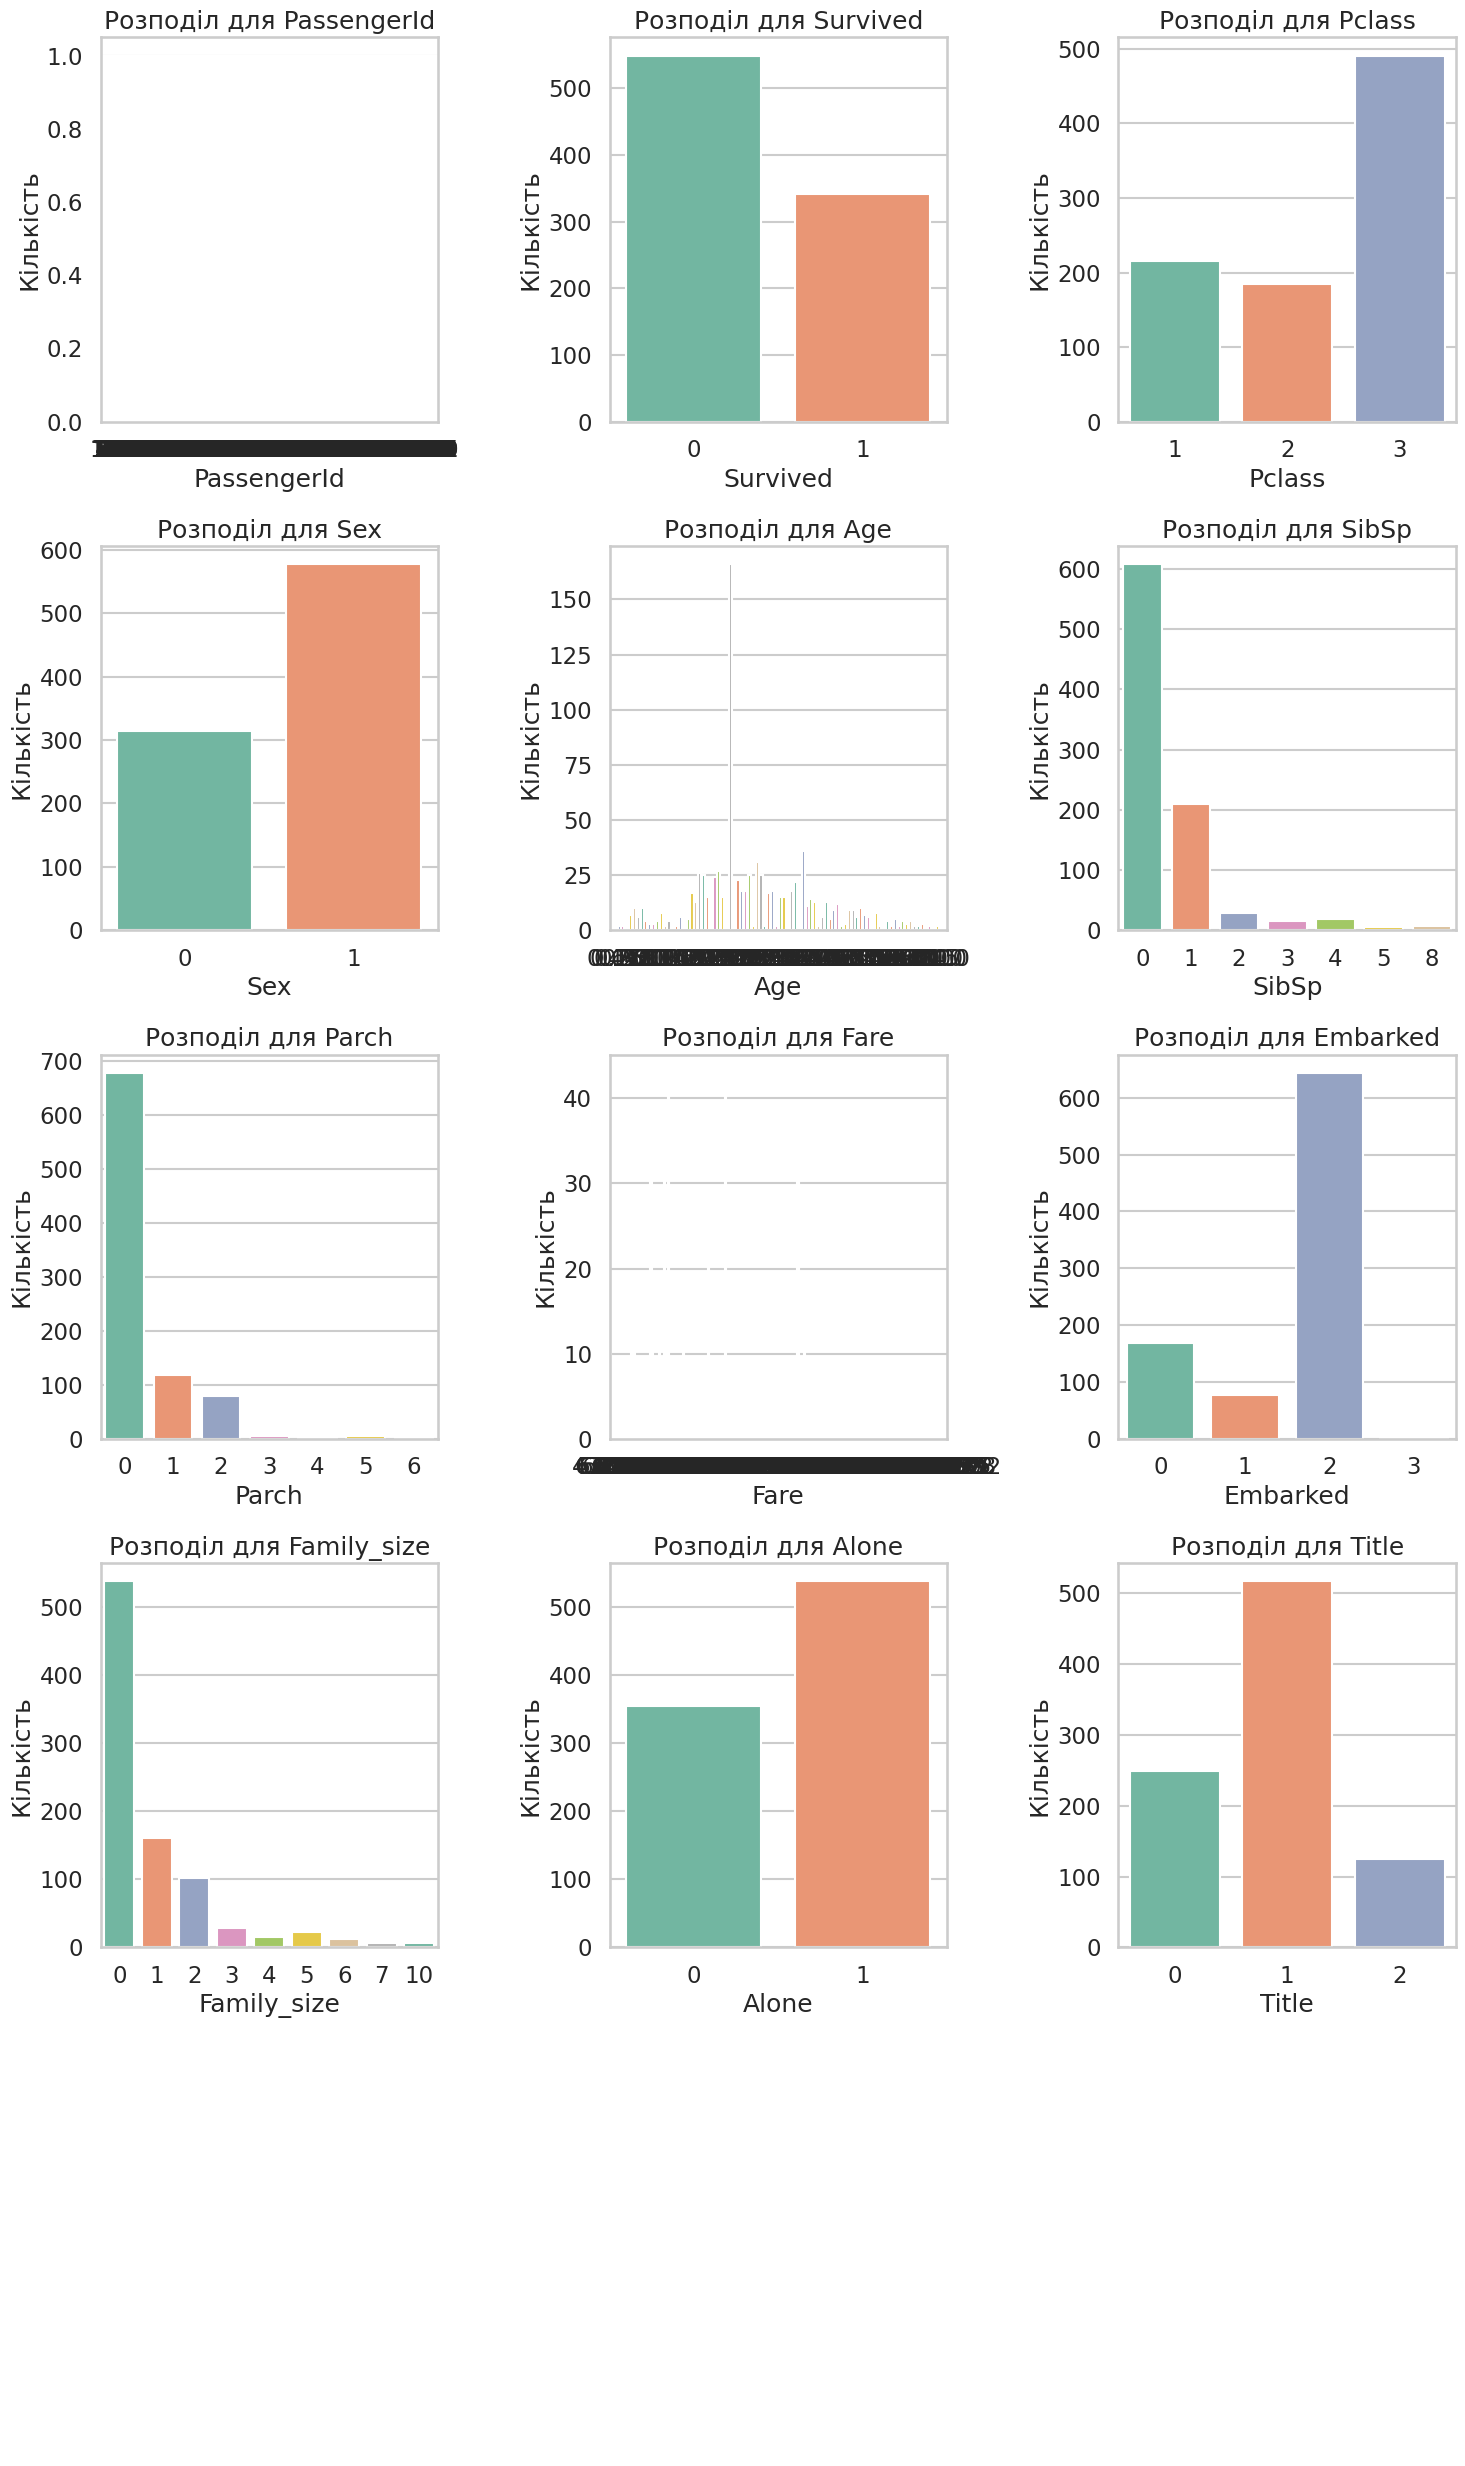

In [53]:
categorical_cols = df.select_dtypes(include=["float", "int"]).columns
num_cols = len(categorical_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Розподіл для {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Кількість")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")


plt.tight_layout()
plt.show()

Спостереження по кожній численній змінній


##Співвіднонешшя між всіма числовими змінними
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

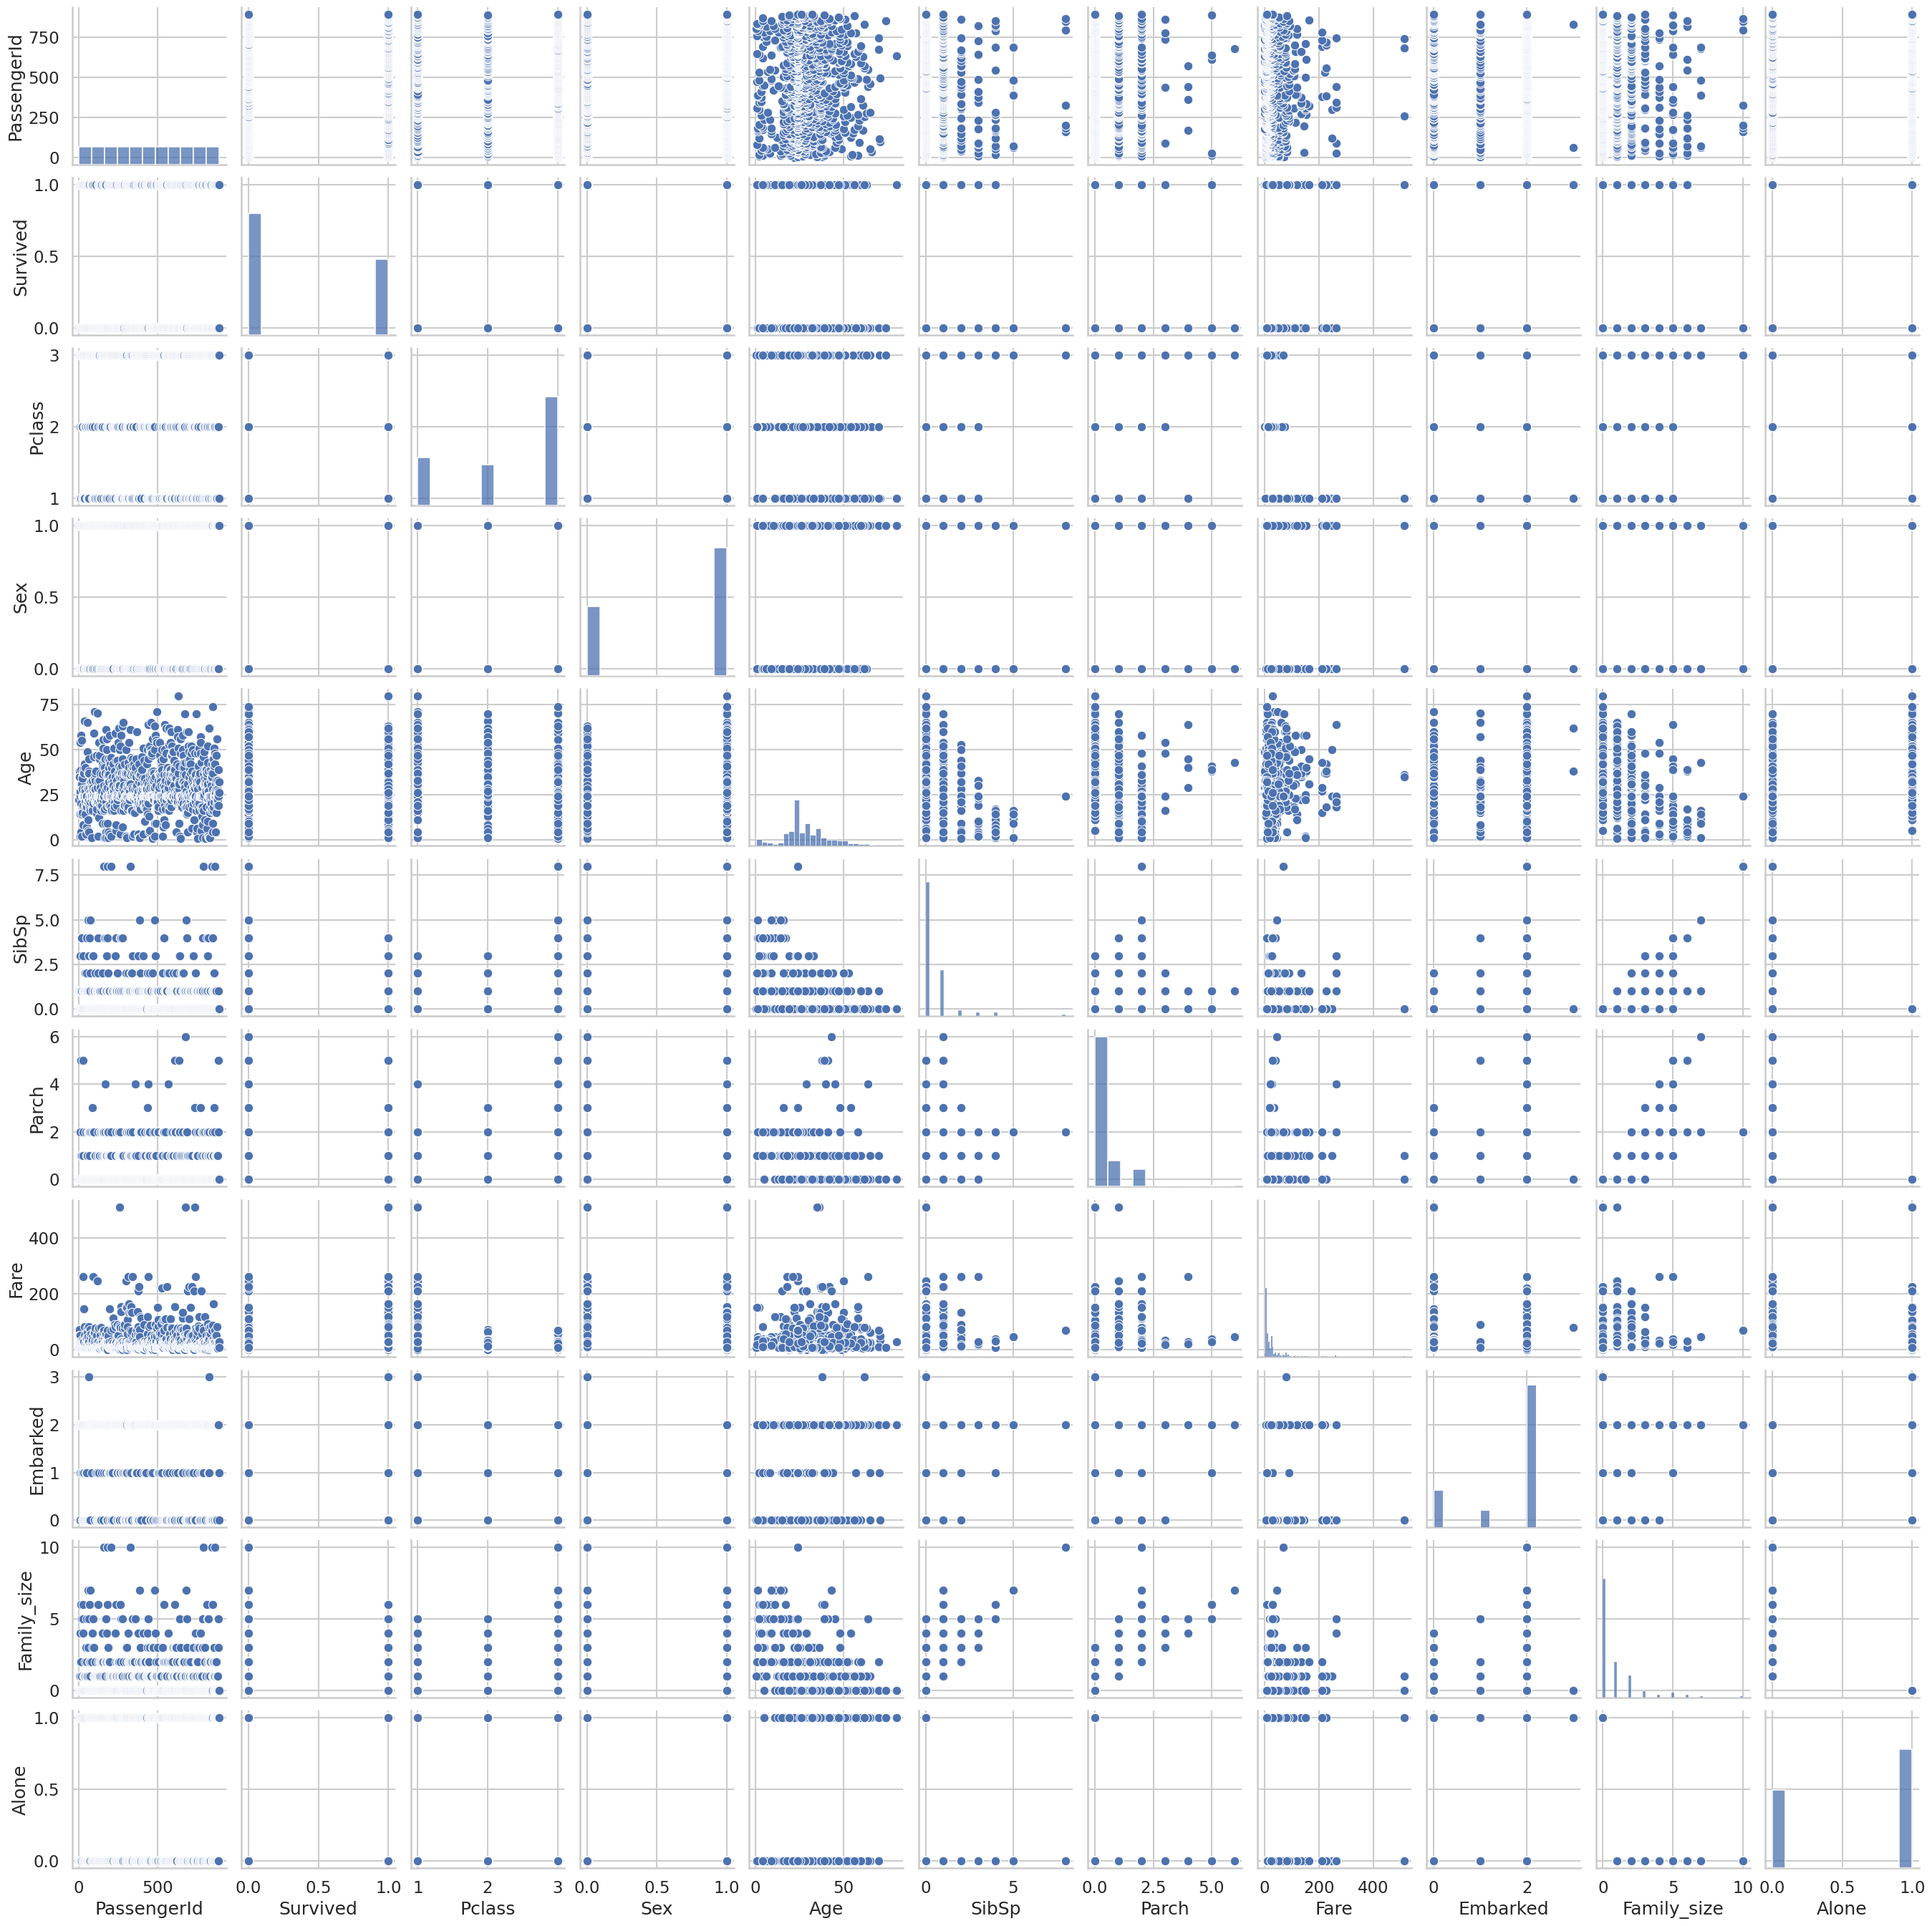

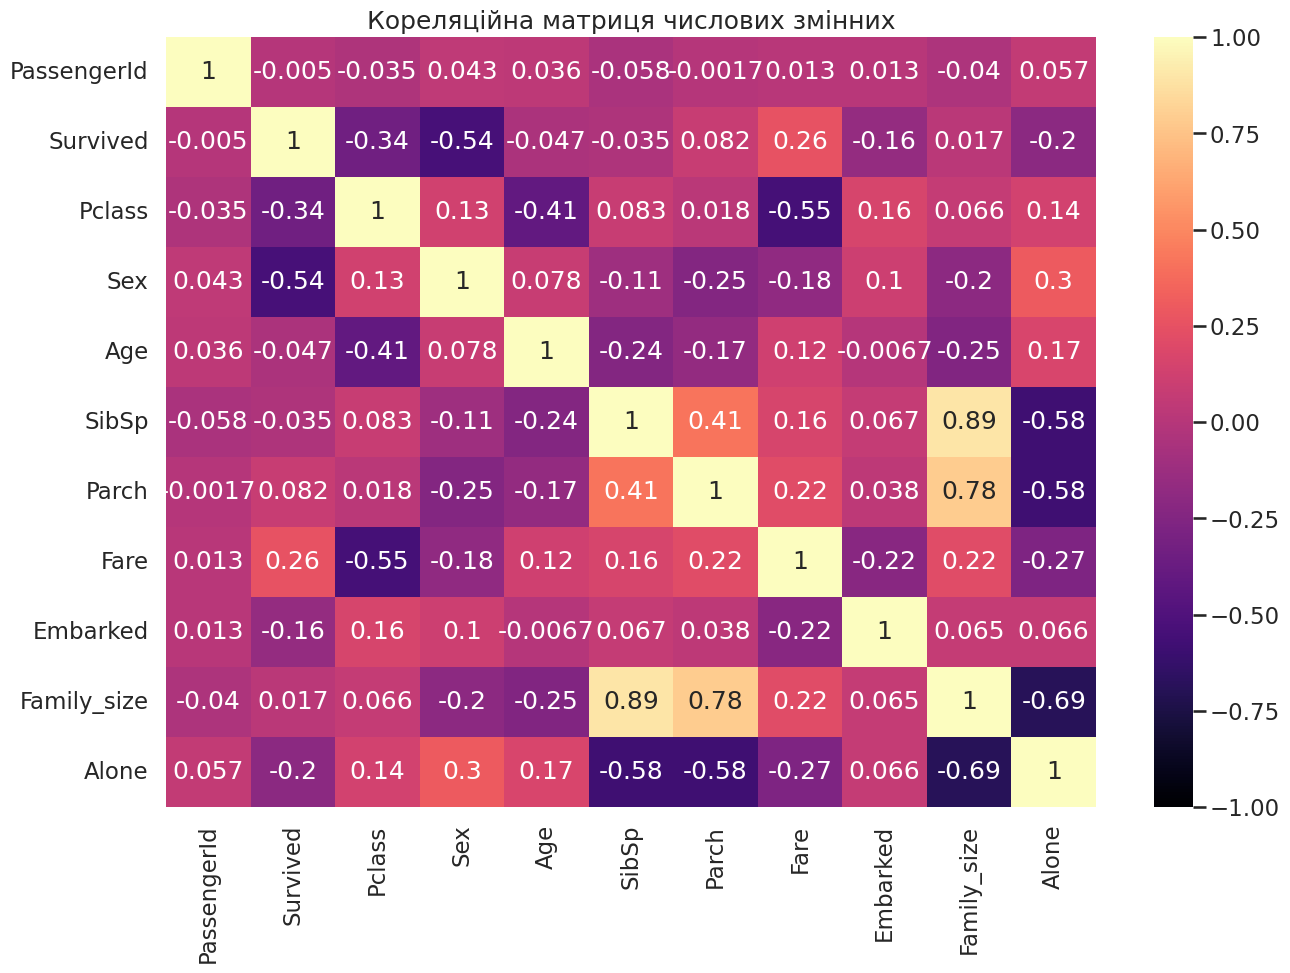

In [ ]:
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns

sns.pairplot(df[numerical_cols])
plt.show()
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="magma", vmin=-1, vmax=1)
plt.title("Кореляційна матриця числових змінних")
plt.show()

Подивившись на кореляційну матрицю, можна побачити, що сильна позитивна кореляція (0.7 - 1) - є у парі змінних: Family_size та SibSp, і у Family_size та Parch. Також середня негативна кореляція (-0.4 - -0.69) - є у парах: Alone - Family_size, Alone - Parch, Alone - SibSp, Fare - Pclass, Pclass - Age

Зважаючи на це, я б прибрав змінну SibSp та Parch.


Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.